## Exercises Hyperparameter tuning and model validation


In [2]:
import pandas as pd
import numpy as np

![Predictions on training set](figures/05.07EXouf.png)

1. Above you see three predictions on training sets. We have only one feature x and a target variable Y.
What can you say about the data in situation A, B and C?


In [2]:
#SOLUTION_START
print("A: the data is underfitted")
print("B: the data is balanced")
print("C: the data is overfitted")
#SOLUTION_END

A: the data is underfitted
B: the data is balanced
C: the data is overfitted


2. My data is underfitted. What are 3 possible ways to solve this?

In [3]:
#SOLUTION_START
print("A: try a more complex model or another kind of model at all")
print("B: decrease the regularization")
print("C: increase the amount of training data")
#SOLUTION_END

A: try a more complex model or another kind of model at all
B: decrease the regularization
C: increase the amount of training data


3. My data is overfitted. Provide 3 possible ways to solve this?

In [4]:
#SOLUTION_START
print("A: try a more simple model")
print("B: increase the regularization and reduce the number of features")
print("C: increase the amount of training data")
print("Tip: use cross-validation to detect possible overfitting")
#SOLUTION_END

A: try a more simple model
B: increase the regularization and reduce the number of features
C: increase the amount of training data
Tip: use cross-validation to detect possible overfitting


 We load the data again from the Concrete Compressive Strength Dataset Regression Notebook
 Import the necessary libraries (Import pandas, numpy, matplotlib, seaborn, and sklearn libraries)

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [4]:

df = pd.read_csv('./data/Concrete_Data.csv')
# Display the first few rows to understand the structure of the dataset
df.head()


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


4. Construct a pipeline PolynomialRegression. First you create the variables with PolynomialFeatures and you feed this data to the linear regression.

In [5]:
#SOLUTION_START
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
#SOLUTION_END

5. From the concrete dataset you predict the strength csMPa by the cement feature.First select the cement feature and transform the series into a numpy array. To plot the regression you need to know the min and max vaules of cement.

In [9]:
#SOLUTION_START
y=df['csMPa']
X=df[['cement']].to_numpy()
print(X.min())
print(X.max())
print(y.min())
print(y.max())
#SOLUTION_END

102.0
540.0
2.33
82.6


6. Plot the data for different polyniomial models ( degrees are different). Is the data underfitted or overfitted?

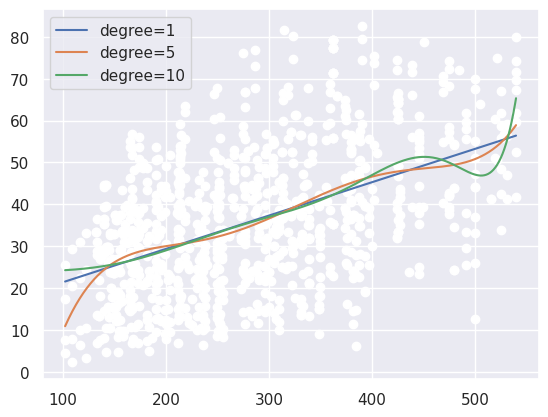

In [33]:
#SOLUTION_START
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(X.min(), X.max(), 500)[:, None]
# print(X, df.head())

plt.scatter(X.ravel(), y, color='white')
# axis = plt.axis()
for degree in [1, 5, 10]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
# plt.xlim(X.min()-10, X.max()+10)
# plt.ylim(y.min()-10, y.max()+10)
plt.legend()
# plt.legend(loc='best');
#we see all models perform poorly on the training set --> underfitting
#SOLUTION_END

7. Plot the result on the training set and the validation set. Use a cross-validation value of 7. Do the graph confirm what you think about (underfitting/overfitting)? Is it useful to use a more complex model?

In [17]:
import sklearn

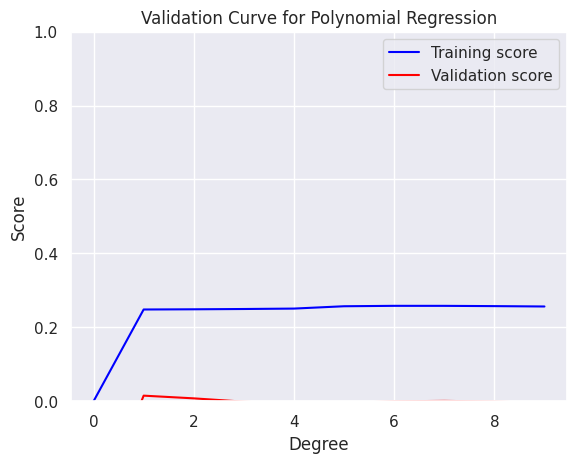

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.22115522, 0.22886284, 0.26968905, 0.28408109, 0.23767017,
        0.27289478, 0.22339644],
       [0.2211674 , 0.22911691, 0.26992746, 0.28462375, 0.23865238,
        0.27446803, 0.22353418],
       [0.22154799, 0.23288014, 0.27097338, 0.28468751, 0.23866933,
        0.27475595, 0.22353778],
       [0.22294599, 0.23413068, 0.27184176, 0.2855817 , 0.2389131 ,
        0.27598292, 0.22567165],
       [0.22808198, 0.23734008, 0.28670555, 0.28775954, 0.24379844,
        0.28114952, 0.23444011],
       [0.22951566, 0.23841824, 0.28835333, 0.2891281 , 0.24457583,
        0.28120263, 0.2359068 ],
       [0.2297565 , 0.23892633, 0.28698563, 0.2906654 , 0.24503181,
        0.27983878, 0.23561163],
       [0.22895625, 0.23863295, 0.28484231, 0.29192817, 0.24532616,
        0.27793641, 0.23410309],
       [0.22754903, 0.23755901, 0.28327743, 0.29246822, 0.24546748,
        0.2761613 , 0.2

In [44]:
#SOLUTION_START
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve # in the datascience handbook we have a deprecated lib!
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


# Define the pipeline for Polynomial Regression: The piplines takes the input features and makes them polynomial features so that the linear regression can use non-linear features:
"""
Define the Pipeline for Polynomial Regression:
python
Copy code
polynomial_regression = Pipeline([
    ("polynomialfeatures", PolynomialFeatures()),
    ("linearregression", LinearRegression())
])
This line creates a pipeline called polynomial_regression consisting of two main components:
Polynomial Features: The first step generates polynomial features based on the input features, which allows the linear regression model to capture non-linear patterns.
Linear Regression: The second step fits a linear regression model to the polynomial features.
"""
polynomial_regression = Pipeline([
    ("polynomialfeatures", PolynomialFeatures()),
    ("linearregression", LinearRegression())
])

# Define the range of degrees for the polynomial features
degree = np.arange(0, 10)
# print(degree)

# Get validation curve scores
train_score, val_score = validation_curve(polynomial_regression, X, y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,
                                          cv=7)

# Plot the learning curves
# print(val_score)
plt.plot(degree, np.mean(train_score, axis=1), color='blue', label='Training score')
plt.plot(degree, np.mean(val_score, axis=1), color='red', label='Validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Validation Curve for Polynomial Regression')
plt.show()
# pd.DataFrame(train_score).head()
train_score
# no the results are overall poor even for the training set. We see that the validation set have the best results for degree 1.
# But the model is not useful
#SOLUTION_END

8. To improve the results we include more features: include also water and age in X

In [ ]:
#SOLUTION_START
X = df[['cement', 'water', 'age']]
y=df['csMPa']
#SOLUTION_END

9. Plot the validation_curve for these features, optionally you even can add a standardscaler to your pipeline. Be aware that the cross validation score uses the negative mean square error (see documentation). Investigate for degrees 1 up to 10. Use the median value or the mean for the training scores and the validation scores. You see a sligth difference.

Cross-Validation MSE (mean squared error): [375.51646454 132.07879617 114.6071133  101.11233427 124.76523768
 144.71729503 109.50246207]
Average CV MSE: 157.47138615080596


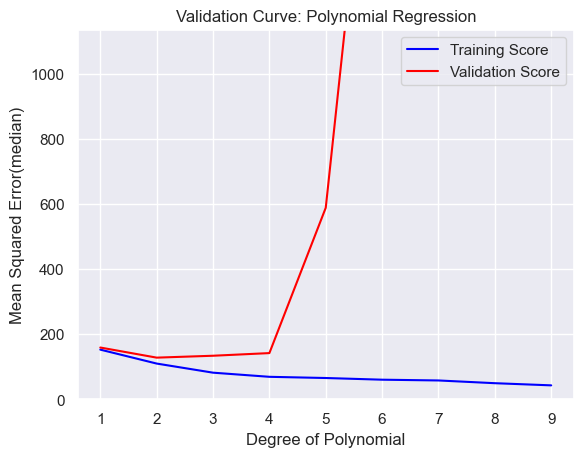

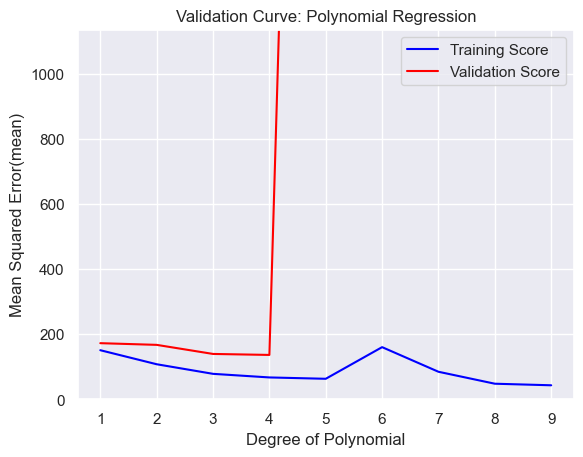

In [ ]:
#SOLUTION_START
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



# Create a pipeline that includes polynomial features and linear regression
polynomial_degrees = [1, 2, 3, 4,5,6,7]  # You can test different degrees

# Initialize a PolynomialRegression pipeline for a specific degree (start with 2 for demonstration)
model = Pipeline([('standard_scaler',StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Perform cross-validation to evaluate the model
from sklearn.model_selection import cross_val_score

# Use cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=7, scoring='neg_mean_squared_error')

# Display cross-validation results
print("Cross-Validation MSE (mean squared error):", -cv_scores)
print("Average CV MSE:", -cv_scores.mean())

# Validation curve to check for overfitting/underfitting at different degrees
degrees = np.arange(1, 10)
train_scores, validation_scores = validation_curve(
    model, X, y, param_name='poly_features__degree', param_range=degrees, cv=5, scoring='neg_mean_squared_error'
)

# Plot the validation curve for median
plt.plot(degrees, -np.median(train_scores, axis=1), label='Training Score', color='blue')
plt.plot(degrees, -np.median(validation_scores, axis=1), label='Validation Score', color='red')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error(median)')
plt.title('Validation Curve: Polynomial Regression')
plt.legend(loc='best')
plt.ylim(0, max(-np.mean(train_scores, axis=1).max(), -np.mean(validation_scores, axis=1).max()) + 1000)
plt.show()

# Plot the validation curve for median
plt.plot(degrees, -np.mean(train_scores, axis=1), label='Training Score', color='blue')
plt.plot(degrees, -np.mean(validation_scores, axis=1), label='Validation Score', color='red')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error(mean)')
plt.title('Validation Curve: Polynomial Regression')
plt.legend(loc='best')
plt.ylim(0, max(-np.mean(train_scores, axis=1).max(), -np.mean(validation_scores, axis=1).max()) + 1000)
plt.show()
#SOLUTION_END
#we see that degree 3 (2(median) or 4(mean)) are the best choice in this case

10. Let's use gridsearch to find the optimum degree

Optimal Polynomial Degree: 4
Best Cross-Validated MSE: 136.2429885111301


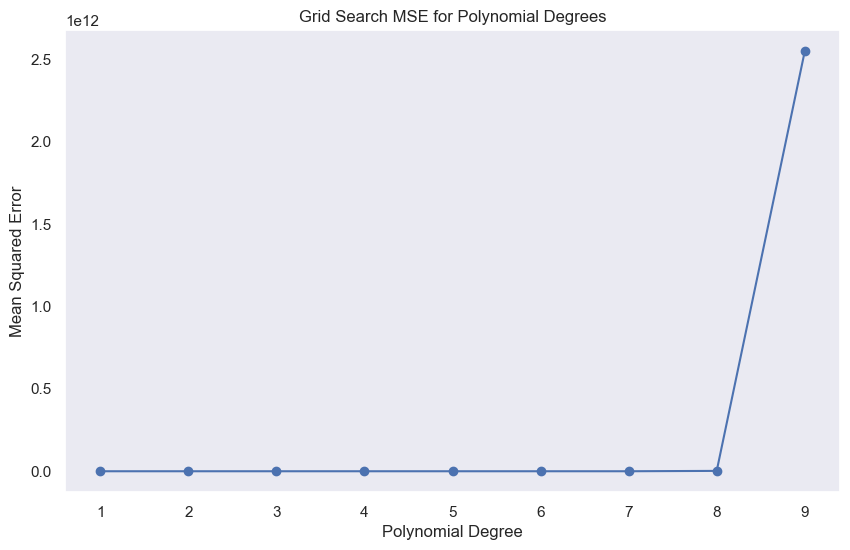

In [ ]:
#SOLUTION_START
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


# Select features (cement, water, age) and target (csMPa)
X = df[['cement', 'water', 'age']]
y = df['csMPa']

# Create a pipeline that includes scaling, polynomial features, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),               # StandardScaler to normalize the input features
    ('poly_features', PolynomialFeatures()),     # Polynomial features (degree will be tuned)
    ('linear_regression', LinearRegression())   # Linear regression
])

# Define the grid of parameters to search
param_grid = {
    'poly_features__degree': np.arange(1, 10)  # Test polynomial degrees from 1 to 9
}

# Setup the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Get the best degree and corresponding score
best_degree = grid_search.best_params_['poly_features__degree']
best_score = -grid_search.best_score_  # Convert back to positive MSE

print(f"Optimal Polynomial Degree: {best_degree}")
print(f"Best Cross-Validated MSE: {best_score}")

# Optional: Visualize the results
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results['param_poly_features__degree'], -results['mean_test_score'], marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Grid Search MSE for Polynomial Degrees')
plt.xticks(results['param_poly_features__degree'])
plt.grid()
plt.show()
#SOLUTION_END

11. Extend the model with the same gridsearch but now for a ridge regression and try different ridge factors 1 0.5 and 0.1

/Users/ronybaekeland/PycharmProjects/DAI32425/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.56644e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/ronybaekeland/PycharmProjects/DAI32425/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.88225e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/ronybaekeland/PycharmProjects/DAI32425/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.90907e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Optimal Polynomial Degree: 4
Optimal Ridge Factor (Alpha): 1.0
Best Cross-Validated MSE: 131.5244425678079


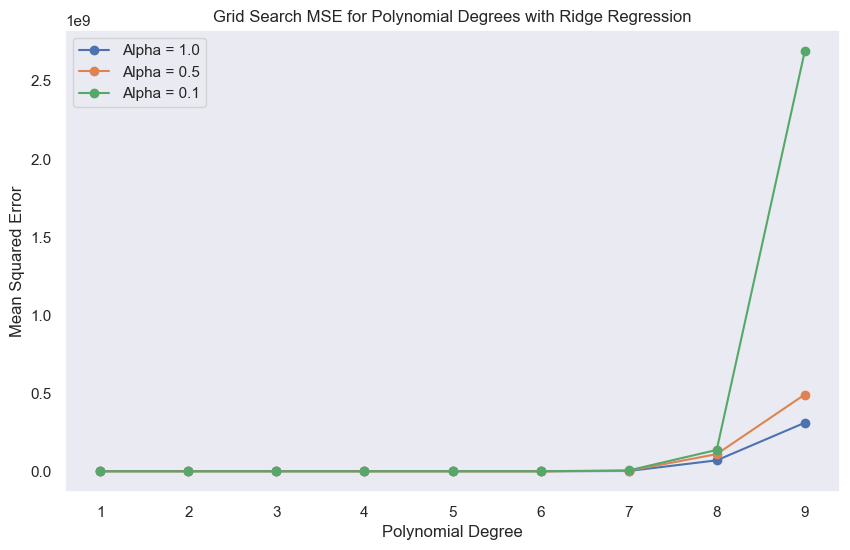

In [ ]:
#SOLUTION_START
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline



# Select features (cement, water, age) and target (csMPa)
X = df[['cement', 'water', 'age']]
y = df['csMPa']

# Create a pipeline that includes scaling, polynomial features, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),               # StandardScaler to normalize the input features
    ('poly_features', PolynomialFeatures()),     # Polynomial features (degree will be tuned)
    ('ridge_regression', Ridge())                # Ridge regression
])

# Define the grid of parameters to search
param_grid = {
    'poly_features__degree': np.arange(1, 10),  # Test polynomial degrees from 1 to 9
    'ridge_regression__alpha': [1.0, 0.5, 0.1]   # Ridge factors to test
}

# Setup the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and corresponding score
best_degree = grid_search.best_params_['poly_features__degree']
best_alpha = grid_search.best_params_['ridge_regression__alpha']
best_score = -grid_search.best_score_  # Convert back to positive MSE

print(f"Optimal Polynomial Degree: {best_degree}")
print(f"Optimal Ridge Factor (Alpha): {best_alpha}")
print(f"Best Cross-Validated MSE: {best_score}")

# Optional: Visualize the results
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
scores_matrix = results['mean_test_score'].reshape(len(np.arange(1, 10)), len([1.0, 0.5, 0.1]))
for i, alpha in enumerate([1.0, 0.5, 0.1]):
    plt.plot(np.arange(1, 10), -scores_matrix[:, i], marker='o', label=f'Alpha = {alpha}')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Grid Search MSE for Polynomial Degrees with Ridge Regression')
plt.xticks(np.arange(1, 10))
plt.grid()
plt.legend()
plt.show()
#SOLUTION_END